In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyoff
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import label_binarize


In [14]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [15]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [16]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Nombre de lignes et colonnes

In [18]:
df.shape

(1014, 7)

verification s'il y a les données manquantes

In [19]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

les données statistiques du dataset (moyenne, maximum, ecart-type...etc)

In [20]:
print("Statistiques descriptives :")
print(df.describe())

Statistiques descriptives :
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


transformation des données de target en nombre(high risk = 2 mid risk = 1 et low risk = 0)

In [21]:
df = df.replace({'RiskLevel' : {'high risk' : 2, 'low risk' : 0, 'mid risk' : 1}})
print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86          2
1   35         140           90  13.0      98.0         70          2
2   29          90           70   8.0     100.0         80          2
3   30         140           85   7.0      98.0         70          2
4   35         120           60   6.1      98.0         76          0


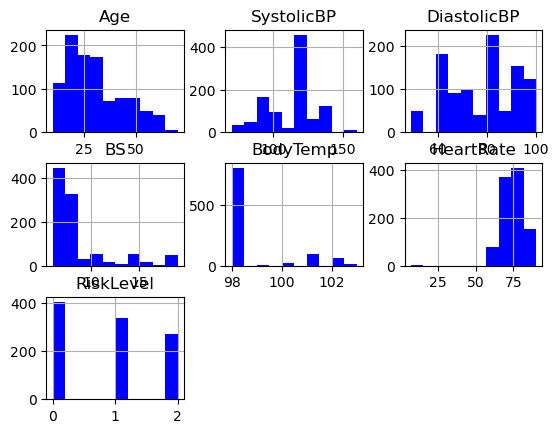

In [26]:
df.hist(bins=10, color='blue', alpha=1)
plt.subtitle('Histogramme des features')
plt.show()

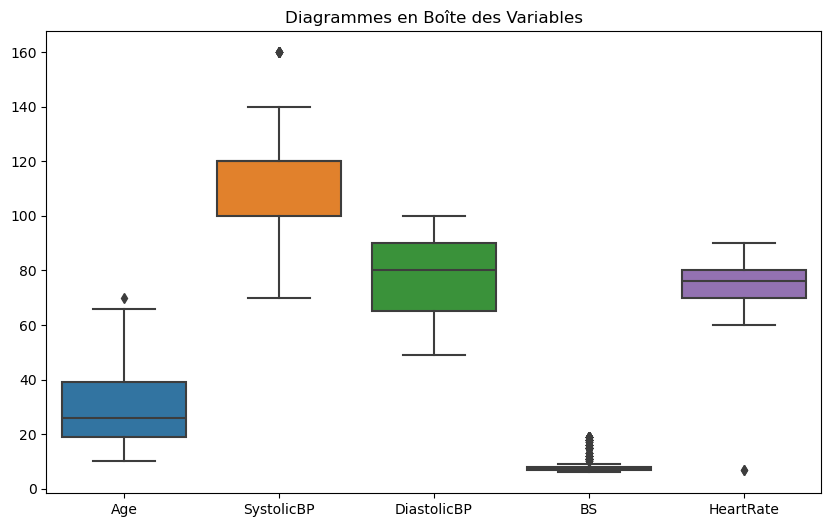

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Diagrammes en Boîte des Variables")
plt.show()

In [ ]:
target_Risk = df['RiskLevel'].value_counts().reset_index()
print(target_Risk)

   RiskLevel  count
0   low risk    406
1   mid risk    336
2  high risk    272


On attribue toutes les données d'entrées à la variable X sauf la dernière colonne qui est celle de la sortie à la variable y

In [ ]:
X = df.drop(columns=['RiskLevel']) 
y = df.loc[:]['RiskLevel']

Division du dataset en données d'entrainement (20 instances) et de test (20 instances) pour une première

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, train_size=20, random_state=0)

Nous allons effectué une mise à l'echelle des features: feature scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Définition de nos fonctions de distance possibles

In [ ]:
def euclidean_distance(x1, x2):
  distance = []
  for i in range(x1.shape[0]):
    dist = 0
    for j in range(x1.shape[1] - 1):
      dist += (x1[i][j] - x2[j])**2
    distance.append(np.sqrt(dist))
  return distance

def manhattan_distance(x1, x2):
  distance = []
  for i in range(x1.shape[0]):
    dist = 0
    for j in range(x1.shape[1] - 1):
      dist += abs(x1[i][j] - x2[j])
    distance.append(dist)
  return distance

def chebyshev_distance(x1, x2):
  distance = []
  for i in range(x1.shape[0]):
    dist = 0
    for j in range(x1.shape[1] - 1):
      dist = max(dist, abs(x1[i][j] - x2[j]))
      distance.append(dist)
  return distance

Définition de la  fonction pour trouver les k plus proches voisins d'un point donné

In [ ]:
def find_neighbors(X_train, y, x, k):
  neighbors = []
  distance = euclidean_distance(X_train, x)

  for i in range(k):
    neighbors.append((min(distance), distance.index(min(distance))))
    distance[distance.index(min(distance))] = max(distance) + 1
  return neighbors[:k]

Définition de la fonction pour prédire l'étiquette d'un point de test en utilisant les k plus proches voisins

In [ ]:
def predict(X_train, y, x, k):
  neighbors = find_neighbors(X_train, y, x, k)
  frequency = [0, 0, 0]
  for i in neighbors:
    if y[i[1]] == 0:
      frequency[0] += 1
    elif y[i[1]] == 1:
      frequency[1] += 1 
    elif y[i[1]] == 2:
      frequency[2] += 1    
      
  return frequency.index(max(frequency))
 

l'algorithme knn

In [ ]:
k = 2
def knn_algorithm(X_train, y_train, X_test, y_test, k):
    y_predicted = []
    for i in range(X_test.shape[0]):
        x = X_test[i]
        pred = predict(X_train, y, x, k)
        y_predicted.append(pred)
        
    return y_predicted

In [ ]:
predicted_values = knn_algorithm(X_train, y_train, X_test, y_test, k)
print(list(y_test))
print(predicted_values)

[0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0]
[0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0]


EVALUATION DU MODELE (Matrice de confusion, Accuracy, Precision,f1 score, recall....etc)

[0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0]
[[7 0 2]
 [4 1 0]
 [2 1 3]]


C:\Users\Asma\AppData\Local\Temp\ipykernel_14792\459657653.py:20: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



[[7 0 2]
 [4 1 0]
 [2 1 3]]


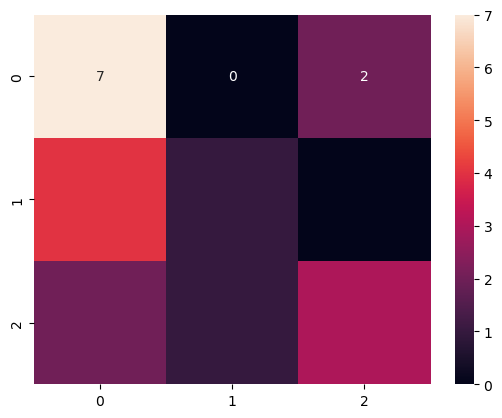

In [ ]:
y_pred = predicted_values
y_true = y_test
confusion_mat = confusion_matrix(y_true, predicted_values)
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(y_true)):
    if y_true[i] == predicted_values[i] == 1:
        TP += 1
    elif y_true[i] == predicted_values[i] == 0:
        TN += 1
    elif y_true[i] != predicted_values[i] and y_true[i] == 1:
        FN += 1
    else:
        FP += 1
confusion_mat == np.array([[TN, FP], [FN, TP]])
print(confusion_mat)
#graphique de la matrice
sns.heatmap(confusion_mat,annot=True)
plt.savefig('h.png')
print(confusion_mat)

FONCTION DE CALCUL DE L'ACCURACY

In [ ]:
accuracy = 0
print(len(y_pred))
for i,j in zip(y_test, y_pred): 
  if i == j: 
    accuracy += 1 
accuracy = accuracy / len(y_test) 
print(f"L'accuracy de notre modèle est de {accuracy:.2f}")

20
L'accuracy du modèle est de 0.55


FONCTION DE CALCUL DE LA PRECISION DE NOTRE MODELE

In [ ]:
def precision(y_test, y_pred):
    TP = 0
    FP = 0
    for yt, yp in zip(y_test, y_pred):
        if yt == 1 and yp == 1:
            TP += 1
        elif yt == 0 and yp == 1:
            FP += 1
    if TP + FP == 0:
        return 0
    else:
        return TP / (TP + FP) 

print('%.2f' % precision(y_test, y_pred))

1.00


FONCTION DE CALCUL DU RECALL

In [ ]:
def recall(y_test, y_pred):
    TP = 0
    FN = 0
    for yt, yp in zip(y_test, y_pred):
        if yt == 1 and yp == 1:
            TP += 1
        elif yt == 1 and yp == 0:
            FN += 1
    if TP + FN == 0:
        return 0
    else:
        return TP / (TP + FN) 

print('%.2f' % recall(y_test, y_pred))

0.20


FONCTION DE CALCUL DU F1 SCORE

In [ ]:
def f1_score(y_test, y_pred):
    TP = 0
    FP = 0
    FN = 0
    for yt, yp in zip(y_test, y_pred):
        if yt == 1 and yp == 1:
            TP += 1
        elif yt == 0 and yp == 1:
            FP += 1
        elif yt == 1 and yp == 0:
            FN += 1
    if TP + FP == 0 or TP + FN == 0:
        return 0
    else:
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        return 2 * (precision * recall) / (precision + recall)

print('%.2f' % f1_score(y_test, y_pred))

0.33


Definition de la fonction pour tracer la courbe ROC et le calcul de l'AUC moy
Etant donné que c'est un modèle de classification multiclasse alors nous devons binariser les etiquettes avant de pouvoir tracer la courbe

AUC moyenne = 0.6204665704665705


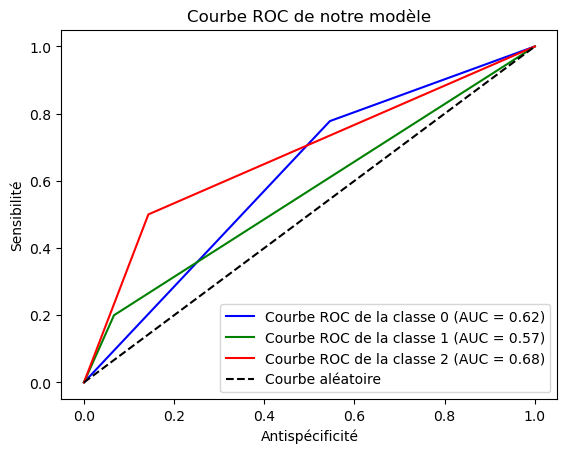

In [ ]:
y_pred = predicted_values
y_true = y_test

y_test = label_binarize(y_true, classes=[0, 1, 2])
y_pred = label_binarize(y_pred, classes=[0, 1, 2]) 
n_classes = 3 

fpr = dict()
tpr = dict() 
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
  roc_auc[i] = roc_auc_score(y_true[:, i], y_pred[:, i])


roc_auc["moyenne"] = roc_auc_score(y_true, y_pred, average="macro")
print("AUC moyenne =", roc_auc["moyenne"])

fig, ax = plt.subplots()
colors = ["blue", "green", "red"]
for i in range(n_classes):
  ax.plot(fpr[i], tpr[i], color=colors[i], label="Courbe ROC de la classe {0} (AUC = {1:0.2f})".format(i, roc_auc[i]))
ax.plot([0, 1], [0, 1], linestyle="--", color="black", label="Courbe aléatoire")
ax.set_xlabel("False Positives") 
ax.set_ylabel("True Positives") 
ax.set_title("Courbe ROC de notre modèle")
ax.legend(loc="lower right") 
plt.show()